In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
df=pd.read_excel('final_feat.xlsx')

In [462]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [463]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


<AxesSubplot:>

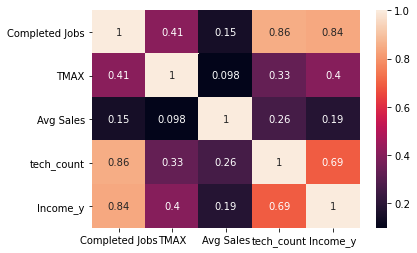

In [464]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [465]:
df1=df1.drop_duplicates(ignore_index=True)

In [466]:

df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

<AxesSubplot:>

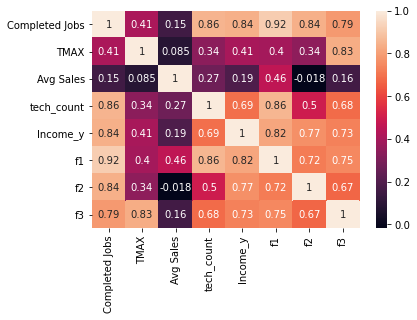

In [467]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [408]:
df1.columns

Index(['Completed Jobs', 'TMAX', 'Avg Sales', 'tech_count', 'Income_y', 'f1',
       'f2', 'f3'],
      dtype='object')

In [877]:
df_2=df1[[ 'f1','f2', 'f3','Income_y',]]

<AxesSubplot:>

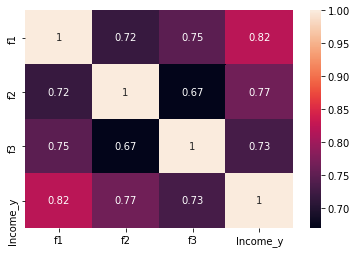

In [878]:
sns.heatmap(df_2.corr(method='spearman'),annot=True)

In [879]:
train=df_2[0:300]
test=df_2[300:]

In [880]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [881]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [882]:
from sklearn.linear_model import LinearRegression

In [883]:
# creating linear regression model

reg_model=LinearRegression(normalize=True)

In [884]:
# fit independent varaibles to the dependent variables
reg_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [885]:
reg_model.score(X_train,y_train)

0.6613570250605855

In [886]:
reg_model.score(X_test,y_test)

0.7762779666079946

In [887]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [888]:
reg_model.score(X_,y_)

0.5110791146692127

In [889]:
y_pred=reg_model.predict(X_)

In [890]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

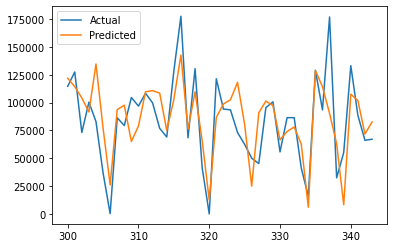

In [891]:
comp.plot()

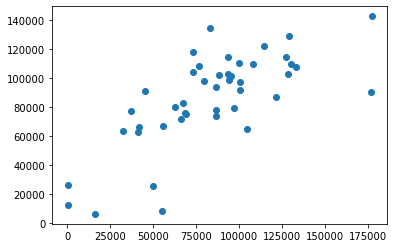

In [892]:
plt.scatter(y_,y_pred)

In [893]:
from sklearn import metrics

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 27032.227870066366
MAE: 21239.37458612718


In [894]:
comp['Error']=comp['Actual']-comp['Predicted']

In [895]:
comp

,Actual,Predicted,Error
300,114534.21,121811.038778,-7276.828778
301,127412.10,114248.340977,13163.759023
302,73107.94,104155.832987,-31047.892987
303,100335.70,91493.682156,8842.017844
304,82920.44,134564.095456,-51643.655456
305,36992.00,77200.170741,-40208.170741
306,326.00,26154.061125,-25828.061125
307,86287.17,93667.034101,-7379.864101
308,79380.38,97571.505227,-18191.125227
309,104509.01,65097.121935,39411.888065


# Ridge 

In [896]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [897]:
# Intializig ridge model
reg_model_1=Ridge()

In [898]:
# lamda parameter range 

hyperparameter_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [899]:
# Searching best hyperparameter using gridsearch 

ridge_reg=GridSearchCV(reg_model_1,hyperparameter_range,scoring='neg_root_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [900]:
# Best lamda
ridge_reg.best_params_

{'alpha': 30}

In [901]:
# error value 
ridge_reg.best_score_

-37346.42624359385

In [902]:
reg_model_2=Ridge(alpha=30)

In [903]:
reg_model_2.fit(X_train,y_train)

Ridge(alpha=30)

In [904]:
reg_model_2.score(X_train,y_train)

0.6595241232160907

In [905]:
reg_model_2.score(X_test,y_test)

0.7733000827993699

In [906]:
reg_model_2.score(X_,y_)

0.5388217102273167

In [907]:
y_pre_1=reg_model_2.predict(X_)

In [908]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

RMSE: 26254.09015006133
MAE: 20067.805761699015


In [909]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pre_1})

<AxesSubplot:>

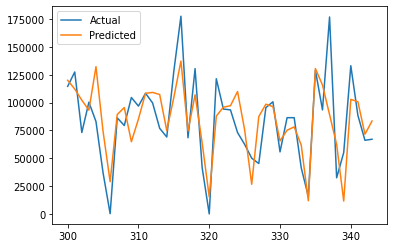

In [910]:
comp_2.plot()

In [911]:
comp_2['Error']=comp_2['Actual']-comp_2['Predicted']

In [912]:
comp_2

,Actual,Predicted,Error
300,114534.21,119968.674584,-5434.464584
301,127412.10,112111.226655,15300.873345
302,73107.94,102100.713671,-28992.773671
303,100335.70,93206.467561,7129.232439
304,82920.44,132170.558347,-49250.118347
305,36992.00,74133.665823,-37141.665823
306,326.00,28962.623832,-28636.623832
307,86287.17,89207.831108,-2920.661108
308,79380.38,95550.030748,-16169.650748
309,104509.01,64862.918357,39646.091643


# Lasso

In [913]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [914]:
# Intializing the model 
reg_model_3=Lasso()

In [915]:
# hyper parameter range 
hyperparameters_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [916]:
# Searching best hyper parameter 

lasso_reg=GridSearchCV(reg_model_3,hyperparameters_range,scoring='neg_root_mean_squared_error',cv=5)

lasso_reg.fit(X,y)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184308594316.6981, tolerance: 113208329.05439414
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168022392839.06586, tolerance: 105941111.49883024
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156545267904.0401, tolerance: 101486300.93390363
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [917]:
#best parameters
lasso_reg.best_params_

{'alpha': 100}

In [918]:
#best score
lasso_reg.best_score_

-37425.913647735826

In [919]:
lasso_pre=Lasso(alpha=100)

In [920]:
lasso_pre.fit(X_train,y_train)

Lasso(alpha=100)

In [921]:
#train score
lasso_pre.score(X_train,y_train)

0.6613491702118395

In [922]:
# test score
lasso_pre.score(X_test,y_test)

0.7759854008888422

In [923]:
#unseen data
lasso_pre.score(X_,y_)

0.5124862989092348

In [924]:
y_pre_2=lasso_pre.predict(X_)

In [925]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

RMSE: 26993.298529668486
MAE: 21187.836405111393


In [926]:
comp_3=pd.DataFrame({'Actual':y_,'Predicted':y_pre_2})

<AxesSubplot:title={'center':'Lasso Regression'}>

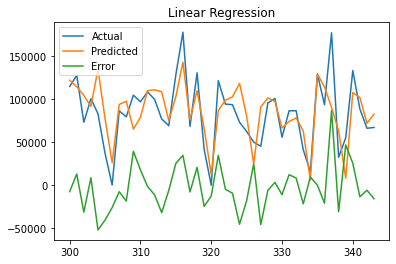

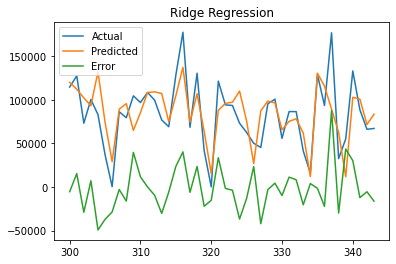

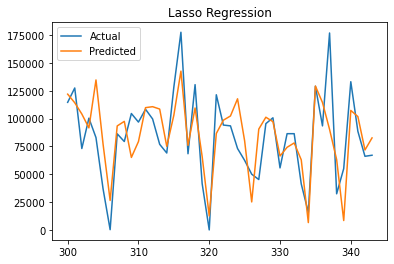

In [927]:
#comparision 
comp.plot(title='Linear Regression')
comp_2.plot(title='Ridge Regression')
comp_3.plot(title='Lasso Regression')

In [928]:
print('====Linear Regression========')
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))


print('====Ridge Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

print('====Lasso Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

====Linear Regression========
RMSE: 27032.227870066366
MAE: 21239.37458612718
====Ridge Regression========
RMSE: 26254.09015006133
MAE: 20067.805761699015
====Lasso Regression========
RMSE: 26993.298529668486
MAE: 21187.836405111393
